In [ ]:
# This mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive')

# TODO: Enter the foldername in your Drive where you have saved the unzipped
# assignment folder, e.g. 'cs231n/assignments/assignment1/'
FOLDERNAME = 'ntinti'
assert FOLDERNAME is not None, "[!] Enter the foldername."

# Now that we've mounted your Drive, this ensures that
# the Python interpreter of the Colab VM can load
# python files from within it.
import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))

%cd /content/drive/My\ Drive/$FOLDERNAME

Mounted at /content/drive
/content/drive/My Drive/ntinti


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pwd

/content/drive/My Drive/ntinti


# Ames Housing Dataset - Regrese

Notebook se venuje linearni regresi na datasetu prodeje domu v meste Ames. Pro nase ucely postaci prilozeny zjednoduseny datset.

Par zdroju na uvod:
- [Cely dataset](https://jse.amstat.org/v19n3/decock/AmesHousing.txt)
- [Feature description](https://jse.amstat.org/v19n3/decock/DataDocumentation.txt)
- [Clanek](https://jse.amstat.org/v19n3/decock.pdf)


Nacteni knihoven:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Nacteni zjednoduseneho datasetu z csv souboru

In [ ]:
df = pd.read_csv('ames_simple.csv', index_col=0)

Spravne bychom si na novem datasetu meli udelat tzv. Exploratory Data Analysis (EDA), tj. prozkoumat data. My si data jen zevrubne popiseme, ale lze najit spoustu zajimavych prikladu - napr [zde](https://www.kaggle.com/code/sanidhyajadaun/housing-price-prediction-using-linear-regression/notebook) na podobnem datasetu nebo [tady](https://www.kaggle.com/code/harrywang/housing-price-prediction/notebook) na California Housing datasetu.

Vypiseme si prvnich a poslednich 5 radku v tabulce

In [ ]:
df.head()

basement_sf  living_area_sf  price
0       1080.0            1656  215.0
1        882.0             896  105.0
2       1329.0            1329  172.0
3       2110.0            2110  244.0
4        928.0            1629  189.9

In [ ]:
df.tail()

basement_sf  living_area_sf  price
2869       1003.0            1003  142.5
2870        864.0             902  131.0
2871        912.0             970  132.0
2872       1389.0            1389  170.0
2873        996.0            2000  188.0

In [ ]:
len(df.index)

2874

Dataset obsahuje celkem 2874 zazmamu pro 3 featury:
- ``'basement_sf'``: plocha sklepa domu ve ctverecnich stopach (puvodni nazev ``'Total Bsmt SF'``)
- ``'living_area_sf'``: nadzemni obytna plocha ve ctverecnich stopach (puvodni nazev ``'Gr Liv Area'``)
- ``'price'``: cena za kterou se dum prodal v tisicich dolarech (puvodni nazev ``'SalePrice'``)

Zjevne zavislosti nam demonstruji scatterploty nize

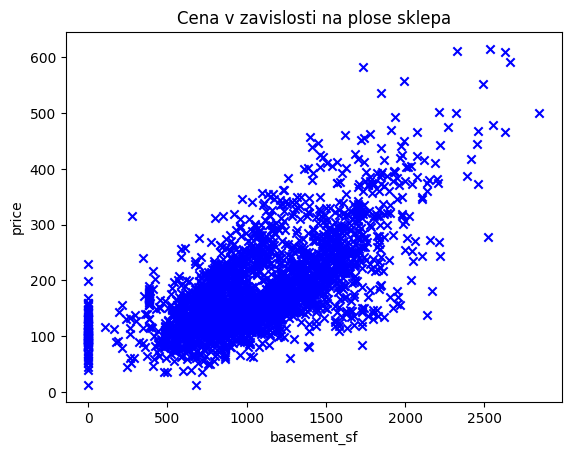

In [ ]:
plt.scatter(df.basement_sf, df.price, marker='x', c='b')
plt.title('Cena v zavislosti na plose sklepa')
plt.xlabel('basement_sf')
plt.ylabel('price')
plt.show()

In [ ]:
plt.scatter(df.living_area_sf, df.price, marker='x', c='g')
plt.title('Cena v zavislosti na nadzemni obytne plose')
plt.xlabel('living_area_sf')
plt.ylabel('price')
plt.show()

Data si rozdelime na trenovaci a testovaci mnozinu a vlozime do prihodne nazvanych promennych.

In [ ]:

X = df[['basement_sf', 'living_area_sf']].iloc[:-10,:].to_numpy()
y = df.price.iloc[:-10].values

# pripadne jinak zapsano
# X = df[['basement_sf', 'living_area_sf']].head(-10).to_numpy()
# y = df.price.head(-10).values

X.shape, y.shape

((2864, 2), (2864,))

In [ ]:
X_test = df[['basement_sf', 'living_area_sf']].iloc[-10:,:].to_numpy()
y_test = df.price.iloc[-10:].values

X_test.shape, y_test.shape

((10, 2), (10,))

## Vypocteme presne reseni

Presne reseni je mozne ziskat pomoci vztahu:

$$\boldsymbol{\Theta = (\tilde{X}^T\tilde{X})^{-1}\tilde{X}^Ty}$$

kde $\tilde{X}$ je matice X doplnena o sloupec samych 1

In [ ]:
X_tilde = np.concatenate([np.ones([X.shape[0], 1]), X], axis=1)
X_tilde

array([[1.000e+00, 1.080e+03, 1.656e+03],
       [1.000e+00, 8.820e+02, 8.960e+02],
       [1.000e+00, 1.329e+03, 1.329e+03],
       ...,
       [1.000e+00, 5.460e+02, 1.092e+03],
       [1.000e+00, 5.460e+02, 1.092e+03],
       [1.000e+00, 5.460e+02, 1.092e+03]])

In [ ]:
X.shape, X_tilde.shape

((2864, 2), (2864, 3))

Pozor na rozmery pri maticovem nasobeni. Ruzni autori muzou brat napr $\Theta$ jako sloupcovy vektor a jini jako radkovy. Podobne muzou byt prohozeny rozmery i v pripade $X$ nebo $y$.

Stejne tak je treba si dat pozor na nasobeni - z knihovny numpy by se vam mohli hodit metody matmul a dot.

In [ ]:
def reg_analytical(X_tilde, y):
      '''
      Vypocet analytickeho reseni lin. regrese

      X_tilde - matice X doplnena o sloupec samych 1
      y - vektor spravnych vystupu

      Vraci vektor thet [theta0, theta1, theta2]
      '''

      thetas = np.zeros(X_tilde.shape[1])

      # TODO: Doplnte kod pro vypocet analytickeho reseni
      # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

      thetas = np.linalg.lstsq(X_tilde, y, rcond=None)[0]

      pass
      # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

      return thetas


In [ ]:
reg_analytical(X_tilde, y)

array([-36.26875351,   0.08269191,   0.08711688])

V praxi si reseni muzeme vypocist napr.

*   Položka seznamu
*   Položka seznamu

pomoci knihovny [sklearn.linear_model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score) (vnitrne vyuziva `scipy.linalg`). Muzeme si tak zkontrolovat vypocet z predchoziho kroku.

In [ ]:
from sklearn.linear_model import LinearRegression

reg_sklearn = LinearRegression().fit(X, y)

thetas = np.concatenate([[reg_sklearn.intercept_], reg_sklearn.coef_]) # pro pouziti dale
thetas

array([-36.26875351,   0.08269191,   0.08711688])

Vyhodou teto knihovny  je, ze na rovnou vypocita [koeficient determinence](https://cs.wikipedia.org/wiki/Koeficient_determinace) $R^2$, ktery urcuje kvalitu regresniho modelu.

In [ ]:
reg_sklearn.score(X, y)

0.6718152786433088

$R^2=0.672$ tedy model neni nijak moc dobry (perfektni model by mel skore 1).

## Test predikce

Otestujeme predikci na testovacim datasetu. V tabulce nize vidime skutecnou cenu domu, cenu domu predikovanou pomoci naseho modelu (pouzivame analyticky vypoctene $\Theta$) a jejich rozdil.

In [ ]:
pred_sklearn = reg_sklearn.predict(X_test)
pred_sklearn = np.floor(pred_sklearn*10)/10 # zaokrouhleni na jedno desetine misto

df_sklearn = pd.DataFrame({
    'price': y_test,
    'predicted_price': pred_sklearn,
    'difference': (pred_sklearn - y_test),
    'difference_percent': np.floor(((pred_sklearn - y_test) / y_test) * 100)
})

df_sklearn.head(10)

price  predicted_price  difference  difference_percent
0   71.0            104.0        33.0                46.0
1  150.9            257.1       106.2                70.0
2  188.0            257.1        69.1                36.0
3  160.0            154.9        -5.1                -4.0
4  131.0            171.5        40.5                30.0
5  142.5            134.0        -8.5                -6.0
6  131.0            113.7       -17.3               -14.0
7  132.0            123.6        -8.4                -7.0
8  170.0            199.5        29.5                17.0
9  188.0            220.3        32.3                17.0

## Chybova funkce

Model je dan funkci $\hat{y}$ a chyba modelu je $J(\Theta)$:

$$\hat{y} = \Theta_0 + \Theta_1 x_1^{(i)} + \Theta_2 x_2^{(i)}$$

$$J(\Theta) = \frac{1}{2} \sum_{i=1}^{n}(y_i - \hat{y}_i)^2 = \frac{1}{2}  \sum_{i=1}^{n}(y_i - \Theta_0 - \Theta_1 x_1^{(i)} - \Theta_2 x_2^{(i)})^2$$

kde:
- $x_1^{(i)}$ je feature $x_1$ (napr basement_sf) pro $i$-ty vzorek
- $x_2^{(i)}$ je feature $x_2$ (napr living_area_sf) pro $i$-ty vzorek

In [ ]:
def loss_sum(theta0, theta1, theta2, X, y):
    '''
    Vypocet hodnoty chybove funkce s pomoci sumy

    Vraci hodnotu chyby.
    '''

    loss = 0

    # TODO: Doplnte kod pro vypocet hodnoty chybove funkce
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    m = len(y)  # počet příkladů

    # Vektorizovaný výpočet hodnoty chyby pro všechny příklady najednou
    errors = X_tilde @ np.array([theta0, theta1, theta2]) - y

    # Vektorizovaný výpočet celkové chyby
    loss = (errors @ errors) / (2 * m)
    pass

    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    return loss



Chyba analytickeho reseni

In [ ]:
loss_sum(thetas[0], thetas[1], thetas[2], X, y)

951.3766014193093

Root Mean Squred Error (RMSE) nam napovi, jak moc velka je prumerna chyba v puvodnich jednotkach (chyba je totiz v dolarech na druhou).

In [ ]:
np.sqrt(2*loss_sum(thetas[0], thetas[1], thetas[2], X, y)) / len(y) # 2* ptz chybova funkce obsahuje 1/2

0.015230642250483175

### Cenova funkce - vektorizovana

Model je dan funkci $\hat{y}$ a chyba modelu je $J(\Theta)$:

$$\hat{y} = \Theta_0 x_0^{(i)} + \Theta_1 x_1^{(i)} + \Theta_2 x_2^{(i)} = \tilde{X} \Theta$$

$$J(\Theta) = \frac{1}{2} \sum_{i=1}^{n}(y_i - \hat{y}_i)^2$$

kde
- $x_0^{(i)}$ , tj koeficient $x_0$ pro $i$-ty vzorek, je vzdy 1

In [ ]:
def loss_vec(thetas, X_tilde, y):
    '''
    Vektorizovany vypocet hodnoty chybove funkce

    thetas - vektor thet [theta0,theta1,theta2,...]
    X_tilde - matice X se sloupcem samych 1
    y - vystupni hodnota

    Vraci hodnotu chyby.
    '''

    loss = 0

    # TODO: Doplnte kod pro vypocet hodnoty chybove funkce
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
# Vektorizovaný výpočet predikcí
    predikce = X_tilde @ thetas

# Výpočet čtverce rozdílu mezi predikcemi a skutečnými hodnotami
    chyby_ctverec = (predikce - y) ** 2

# Vektorizovaný výpočet celkové chyby
    loss = np.sum(chyby_ctverec) / (2 * len(y))

    pass

    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    return loss

Vypocteme chybu analytickeho reseni

In [ ]:
loss_vec(thetas, X_tilde, y)

951.3766014193093

Rozdil chyb

In [ ]:
np.abs(loss_vec(thetas, X_tilde, y) - loss_sum(thetas[0], thetas[1], thetas[2], X, y))

0.0

### Srovnani rychlosti vypoctu

Spustime 100 opakovani vzpoctu chyby. Vektorizovany vypocet je i na malych datech nasobne rychlejsi.

In [ ]:
%%time
for i in range(100):
    loss_sum(thetas[0], thetas[1], thetas[2], X, y)

CPU times: user 1.84 ms, sys: 0 ns, total: 1.84 ms
Wall time: 1.86 ms


In [ ]:
%%time
for i in range(100):
    loss_vec(thetas, X_tilde, y)

CPU times: user 3.11 ms, sys: 0 ns, total: 3.11 ms
Wall time: 3.07 ms


## Gradient Descent

Pro nalezeni $\Theta$ muzeme pouzit i metodu nejvetsiho spadu. Jedna se o iteracni algoritmus, kdy se po jednolivych krocich "vylepsuje" honota parametru modelu $\Theta$. Kazdy krok je dan jako:

$$\Theta = \Theta - \alpha \frac{\partial}{\partial \Theta} J(\Theta)$$

Nas model je dan funkci $\hat{y}$ a chyba modelu je $J(\Theta)$:

$$\hat{y}_i = \Theta_0 x_0^{(i)} + \Theta_1 x_1^{(i)} + \Theta_2 x_2^{(i)} = \tilde{X} \Theta$$

$$J(\Theta) = \frac{1}{2} \sum_{i=1}^{n}(y_i - \hat{y}_i)^2 = \frac{1}{2} \sum_{i=1}^{n}(y_i - \boldsymbol{\tilde{x}}^{(i)} \Theta)^2$$

Pro metodu nejvetsiho spadu potrebujeme derivaci chybove funkce (navic idealne ve forme maticoveho nasobeni kvuli vektorizaci vypoctu):

$$\frac{\partial}{\partial \Theta} J(\Theta) = -\sum_{i=1}^{n}(y_i - \Theta^T \boldsymbol{\tilde{x}}^{(i)})\boldsymbol{\tilde{x}}^{(i)} = -\tilde{X}^T (\boldsymbol{y} - \tilde{X}\Theta^T) = \tilde{X}^T (\tilde{X}\Theta^T - \boldsymbol{y})$$

Dosadime a dostaneme:

\begin{align*}
\boldsymbol{\Theta} &= \boldsymbol{\Theta} - \alpha \frac{\partial}{\partial \boldsymbol{\Theta}} J(\boldsymbol{\Theta}) \\
\boldsymbol{\Theta} &= \boldsymbol{\Theta} - \alpha \boldsymbol{\tilde{X}}^T (\boldsymbol{\tilde{X}} \boldsymbol{\Theta}^T - \boldsymbol{y})  \\
\end{align*}

In [ ]:
def reg_gradient_descent(X_tilde, y, epochs=100, alpha=1e-3, print_every=10):
    '''
    Vektorizovany vypocet gradientu.

    X_tilde - MAtice X rozsirena o sloupec jednicek,
    y - Vektor obsahujici spravne vystupy
    epochs - pocet iteraci vypoctu
    alpha - learningrate,
    print_every=10
    '''

    # inicializujeme thety na same 0
    thetas = np.zeros(X_tilde.shape[1])

    print('Velikost chyby po %d epochach: %f' % (0, loss_vec(thetas, X_tilde, y)))

    for i in range(epochs):

        # TODO: Doplnte kod pro vypocet jedne iterace gradientu
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        # Vektorizovaný výpočet predikcí

        # Vektorizovaný výpočet predikcí
        predictions = X_tilde @ thetas

        # Výpočet odchylek
        errors = predictions - y

        # Vektorizovaný výpočet gradientu
        gradient = X_tilde.T @ errors / len(y)

        # Aktualizace vah
        thetas -= alpha * gradient


        pass

        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        if (i+1) % print_every == 0:
            # print(thetas)
            print('Velikost chyby po %d epochach: %f' % (i+1, loss_vec(thetas, X_tilde, y)))

    return thetas

thetas_gd = reg_gradient_descent(X_tilde, y, epochs=100, alpha=1e-10, print_every=5)


Velikost chyby po 0 epochach: 18961.578233
Velikost chyby po 5 epochach: 18897.805971
Velikost chyby po 10 epochach: 18834.260377
Velikost chyby po 15 epochach: 18770.940643
Velikost chyby po 20 epochach: 18707.845967
Velikost chyby po 25 epochach: 18644.975550
Velikost chyby po 30 epochach: 18582.328594
Velikost chyby po 35 epochach: 18519.904305
Velikost chyby po 40 epochach: 18457.701891
Velikost chyby po 45 epochach: 18395.720565
Velikost chyby po 50 epochach: 18333.959539
Velikost chyby po 55 epochach: 18272.418031
Velikost chyby po 60 epochach: 18211.095260
Velikost chyby po 65 epochach: 18149.990450
Velikost chyby po 70 epochach: 18089.102825
Velikost chyby po 75 epochach: 18028.431614
Velikost chyby po 80 epochach: 17967.976047
Velikost chyby po 85 epochach: 17907.735357
Velikost chyby po 90 epochach: 17847.708782
Velikost chyby po 95 epochach: 17787.895560
Velikost chyby po 100 epochach: 17728.294932


In [ ]:
# Vypiseme si naucene thety
thetas_gd

array([1.76064069e-06, 2.04380484e-03, 2.85597346e-03])

In [ ]:
loss_vec(thetas, X_tilde, y), loss_vec(thetas_gd, X_tilde, y)

(951.3766014193093, 17728.294931938526)

In [ ]:
# pro informaci - rozdil mezi nejlepsi chybou a chybou z GD
np.abs(loss_vec(thetas, X_tilde, y) - loss_vec(thetas_gd, X_tilde, y))

16776.918330519216

### Srovnani na testovacich datech

In [ ]:
X_test_tilde = np.concatenate([np.ones([X_test.shape[0], 1]), X_test], axis=1) # do testovaci matice pridam sloupec 1

In [ ]:
pred_gd = np.dot(X_test_tilde, thetas_gd)
pred_gd = np.floor(pred_gd*10)/10 # zaokrouhleni na jedno desetine misto

pred_sklearn = reg_sklearn.predict(X_test)
pred_sklearn = np.floor(pred_sklearn*10)/10 # zaokrouhleni na jedno desetine misto

df_compare = pd.DataFrame({
    'price': y_test,
    'predicted_price_sklearn': pred_sklearn,
    'difference_sklearn': (pred_sklearn - y_test),
    'predicted_price_gd': pred_gd,
    'difference_gd': (pred_gd - y_test),
})

df_compare.head(10)

price  predicted_price_sklearn  difference_sklearn  predicted_price_gd  \
0   71.0                    104.0                33.0                 4.2   
1  150.9                    257.1               106.2                 8.4   
2  188.0                    257.1                69.1                 8.4   
3  160.0                    154.9                -5.1                 5.5   
4  131.0                    171.5                40.5                 5.9   
5  142.5                    134.0                -8.5                 4.9   
6  131.0                    113.7               -17.3                 4.3   
7  132.0                    123.6                -8.4                 4.6   
8  170.0                    199.5                29.5                 6.8   
9  188.0                    220.3                32.3                 7.7   

   difference_gd  
0          -66.8  
1         -142.5  
2         -179.6  
3         -154.5  
4         -125.1  
5         -137.6  
6         -126.7  
7         -127.4  
8         -163.2  
9         -180.3

Pro srovnani si testovaci body zobrazime do grafu

In [ ]:
plt.scatter(df.basement_sf, df.price, marker='x', c='b', label='Skutecne')
plt.scatter(X_test[:,0], y_test, marker='x', c='r', label='Skutecne testovaci')
plt.scatter(X_test[:,0], df_compare.predicted_price_gd.values, marker='x', c='y', label='Predikce testovaci')
plt.title('Cena v zavislosti na plose sklepa')
plt.xlabel('basement_sf')
plt.ylabel('price')
plt.legend()
plt.show()

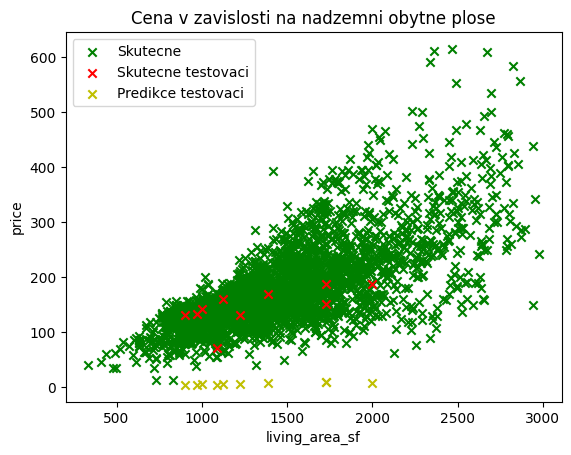

In [ ]:
plt.scatter(df.living_area_sf, df.price, marker='x', c='g', label='Skutecne')
plt.scatter(X_test[:,1], y_test, marker='x', c='r', label='Skutecne testovaci')
plt.scatter(X_test[:,1], df_compare.predicted_price_gd.values, marker='x', c='y', label='Predikce testovaci')
plt.title('Cena v zavislosti na nadzemni obytne plose')
plt.xlabel('living_area_sf')
plt.ylabel('price')
plt.legend()
plt.show()